In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [27]:
df = pd.read_csv('files/world_data_full_apply_nulos.csv',index_col=0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


**1. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.**

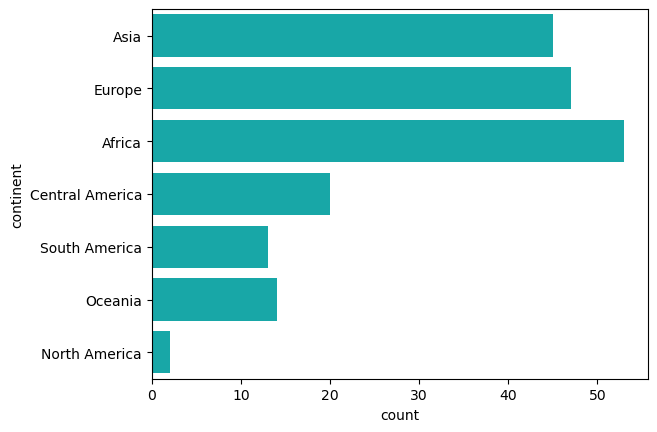

In [6]:
sns.countplot(y = "continent",
              data = df, 
              color = "c");

In [19]:
df_continent = df.groupby("continent")["country"].count().reset_index()
df_continent

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


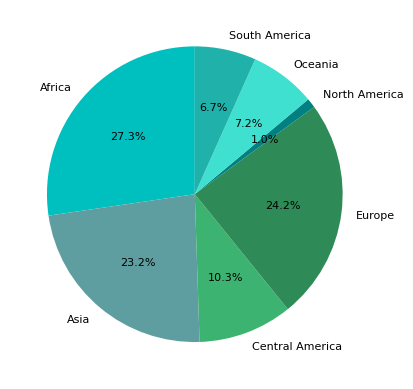

In [20]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie("country", labels="continent",
        data = df_continent, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

**2. ¿Cuáles son los 10 países con la mayor área forestal?**

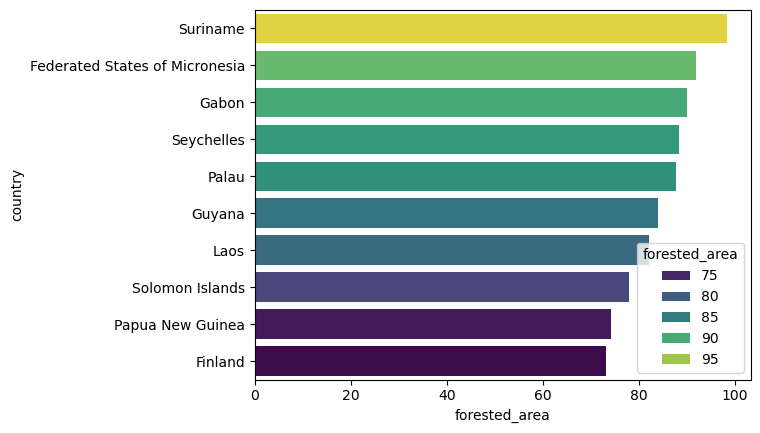

In [37]:
sns.barplot(y = "country",
            x = "forested_area", 
            data = df.sort_values(by="forested_area", ascending=False)[0:10], 
            hue = "forested_area",
            palette= "viridis");

**3. ¿Cómo se distribuye la densidad de población entre los países?**

In [38]:
df[["density", "country"]]

,density,country
0,60.0,Afghanistan
1,105.0,Albania
2,18.0,Algeria
3,164.0,Andorra
4,26.0,Angola
...,...,...
190,32.0,Venezuela
191,314.0,Vietnam
192,56.0,Yemen
193,25.0,Zambia


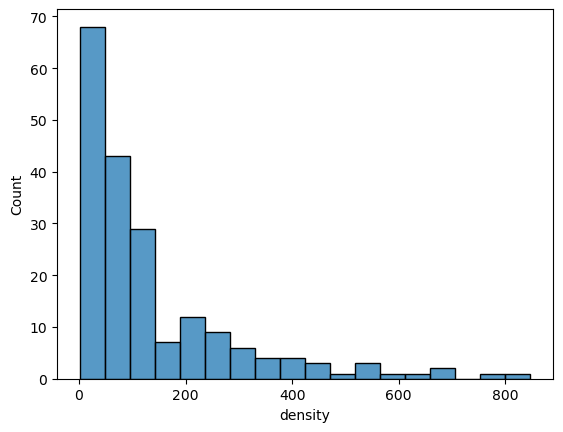

In [45]:
sns.histplot(x = "density", 
            data = df);

La mayoría de los países tienen una densidad de población muy baja.

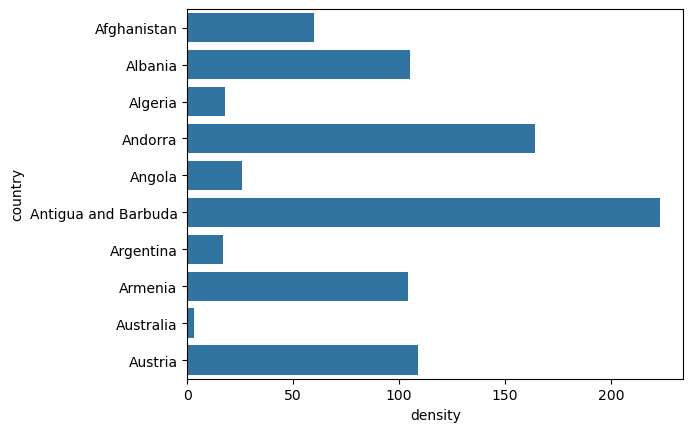

In [46]:
sns.barplot(y = "country",
            x = "density", 
            data = df[0:10]);

**4. ¿Existe una relación entre el PIB y la tasa de desempleo de los países?**

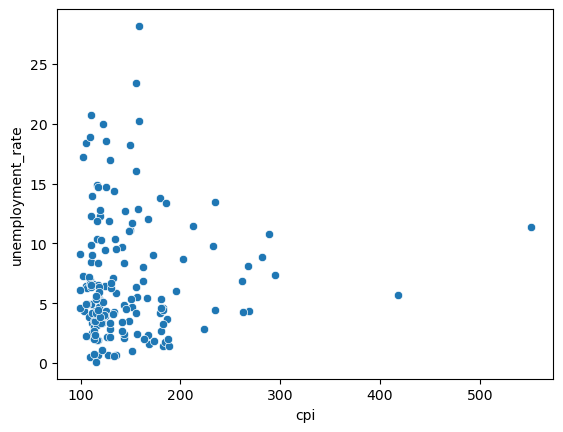

In [ ]:
sns.scatterplot(x = "cpi",
                y = "unemployment_rate",
                data = df);

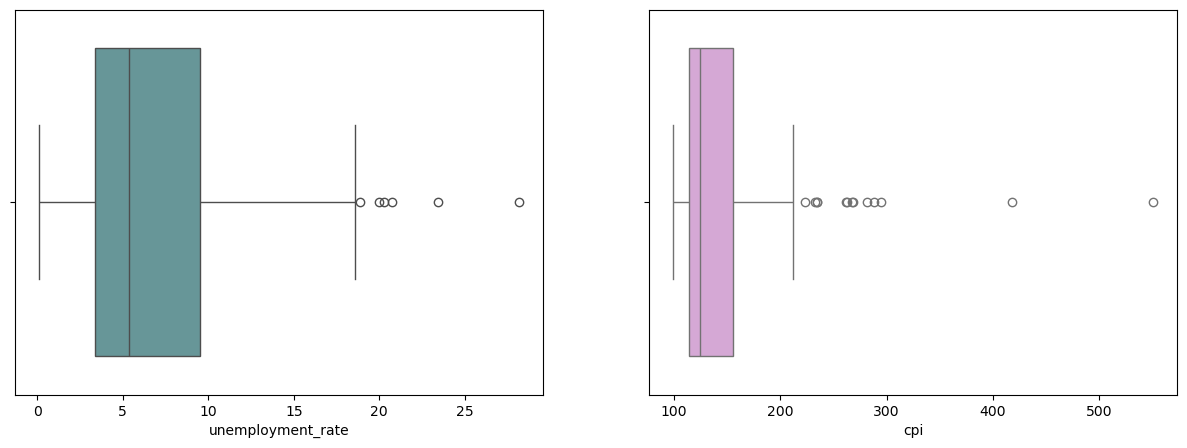

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.boxplot(x = "unemployment_rate",
            data = df,
            color="cadetblue",
            ax = axes[0]);

sns.boxplot(x = "cpi",
            data = df,
            color="plum",
            ax = axes[1]);

Vamos a filtrar para dejar fuera de la gráfica los outliers

In [81]:
df_filtrado = df[(df["cpi"] < 220) & (df["unemployment_rate"] < 18)]
df_filtrado.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
7,Armenia,104.0,AM,58.9,29.743,49.0,13.99,374.0,Yerevan,5.156,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,Yerevan,74.9,26.0,0.66,Armenian,81.6,4.40,NaN,55.6,20.9,22.6,16.99,NaN,40.069099,45.038189,Asia
8,Australia,3.0,AU,48.2,NaN,58.0,12.60,61.0,Canberra,375.908,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,NaN,19.6,3.68,NaN,65.5,23.0,47.4,5.27,NaN,-25.274398,133.775136,Oceania


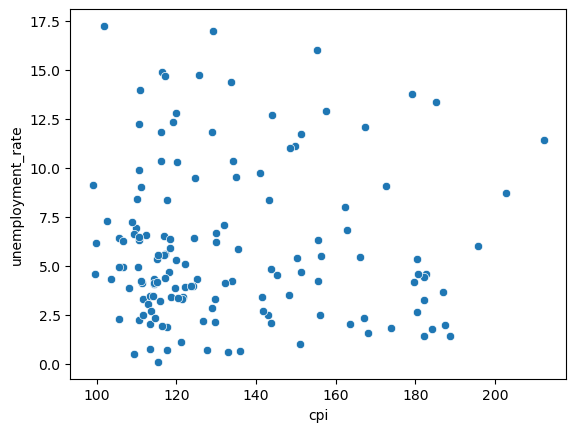

In [83]:
sns.scatterplot(x = "cpi",
                y = "unemployment_rate",
                data = df_filtrado);

**5. ¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?**

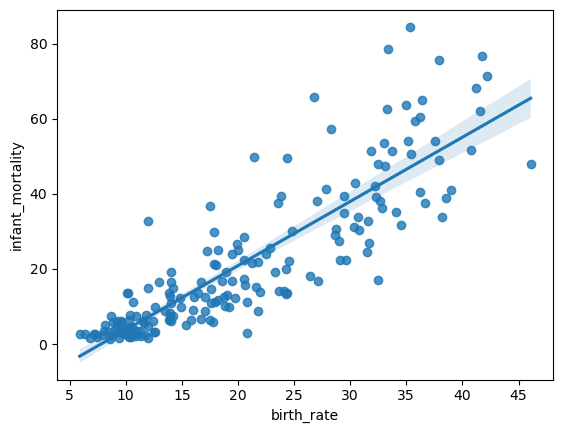

In [ ]:
sns.regplot(x = "birth_rate", 
                y = "infant_mortality", 
                data = df);
